# 5.Modeling

A machine learning model is a file that has been trained to recognize certain types of patterns. We train a model over a set of data, providing it an algorithm that it can use to reason over and learn from those data.

Once we trained the model, we can use it to reason over data that it hasn't seen before, and make predictions about those data.You can use the ML model to get predictions on new data for which you do not know the target.

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
import graphviz

# Data Load

In [2]:
#df = pd.read_csv('raw_data/datascientist_data_step4_features.csv')
df = pd.read_csv('raw_data/datascientist_data_step4a_features.csv')
df.head()

,Founded,Job Title_ACA,Job Title_ACCOUNTING,Job Title_ADJUNCT FACULTY,Job Title_ADMINISTRATIVE ASSISTANT,Job Title_ADOBE ANALYTICS MANAGER,Job Title_ADVANCED ANALYTICS CONSULTING LEAD,Job Title_AI,Job Title_ANALYTICAL,Job Title_ANALYTICS MANAGER,...,Location State_ DE,Location State_ FL,Location State_ IL,Location State_ NJ,Location State_ NY,Location State_ OH,Location State_ PA,Location State_ TX,Location State_ United Kingdom,Est_Salary
0,2007,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,146.0
1,2008,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,146.0
2,1976,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,146.0
3,2019,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,146.0
4,2007,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,146.0


# Train-Test Split

Training and Test Datasets
When fitting models, we would like to ensure two things:

We have found the best model (in terms of model parameters).
The model is highly likely to generalize i.e. perform well on unseen data.

Purpose of splitting data into Training/testing sets
We built our model with the requirement that the model fit the data well.
As a side-effect, the model will fit THIS dataset well. What about new data?
We wanted the model for predictions, right?
One simple solution, leave out some data (for testing) and train the model on the rest

In [3]:
y = df['Est_Salary']
X = df.drop(['Est_Salary'],axis=1, inplace=False)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=47)    
X_train.head()

,Founded,Job Title_ACA,Job Title_ACCOUNTING,Job Title_ADJUNCT FACULTY,Job Title_ADMINISTRATIVE ASSISTANT,Job Title_ADOBE ANALYTICS MANAGER,Job Title_ADVANCED ANALYTICS CONSULTING LEAD,Job Title_AI,Job Title_ANALYTICAL,Job Title_ANALYTICS MANAGER,...,Location State_ CA,Location State_ DE,Location State_ FL,Location State_ IL,Location State_ NJ,Location State_ NY,Location State_ OH,Location State_ PA,Location State_ TX,Location State_ United Kingdom
3485,1983,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1456,1983,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2912,2014,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1081,1976,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
568,1979,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [5]:
X_train.shape, X_test.shape

((3127, 3678), (782, 3678))

In [6]:
y_train.shape,y_test.shape

((3127,), (782,))

## Linear Regression:

###  Measuring only Accuracy Using K Fold cross validation for Linear Regression

We use the following cv_score function to perform K-fold cross-validation and apply a scoring function to each test fold. In this incarnation we use accuracy score as the default scoring function.

In [7]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cv_result = cross_val_score(LinearRegression(), X, y, cv=cv)
cv_result

array([-2.76744211e+17, -2.10763440e+18, -1.11315634e+18, -3.95342155e+16,
       -1.08719577e+19])

In [8]:
print("Score using kfold Cross validation on Linear Regression: ", np.mean(cv_result))

Score using kfold Cross validation on Linear Regression:  -2.881805377396958e+18


### Linear regression with train test split
Since Score from K-fold Linear regression is not good. Trying Linear regression with train test split. 


In [9]:
# train using Linear model
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

#accuracy
accuracy = model.score(X_train,y_train)
print('\nTrain Data Accuracy:- ', accuracy*100,'%')

accuracy = model.score(X_test,y_test)
print('\nTest Data Accuracy:- ', accuracy*100,'%')


Train Data Accuracy:-  78.32902823185368 %

Test Data Accuracy:-  -1.177313438664928e+22 %


In [10]:
y_pred = model.predict(X_test)

### Metrics

Each machine learning model is trying to solve a problem with a different objective using a different dataset and hence, it is important to understand the context before choosing a metric.

Different performance metrics are used to evaluate different Machine Learning Algorithms.

### MAE

We know that an error basically is the absolute difference between the actual or true values and the values that are predicted. Absolute difference means that if the result has a negative sign, it is ignored.

Hence, MAE = True values – Predicted values

MAE takes the average of this error from every sample in a dataset and gives the output.

This can be implemented using sklearn’s mean_absolute_error method:

In [11]:
# Use the linear predict method on the test data
linear_pred = model.predict(X_test)#y_pred
# Calculate the absolute errors
errors = abs(linear_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))


Mean Absolute Error: 44764789385.07


### MAPE

Using MAPE, we can estimate the accuracy in terms of the differences in the actual v/s estimated values.

We initially calculate the absolute difference between the Actual Value and the Estimated/Forecast value. Further, we apply the mean function on the result to get the MAPE value.

MAPE can also be expressed in terms of percentage. Lower the MAPE, better fit is the model.

In [12]:
mape = 100 * (errors / y_test)

accuracy = 100 - np.mean(mape)
print('Mean absolute percentage Accuracy :', round(accuracy, 2), '%.')
print('Mean absolute percentage error (MAPE):', round(np.mean(mape), 2), '%.')

Mean absolute percentage Accuracy : -49133688979.06 %.
Mean absolute percentage error (MAPE): 49133689079.06 %.


### MSE

Mean Squared Errorm of an estimator measures the average of error squares i.e. the average squared difference between the estimated values and true value. It is a risk function, corresponding to the expected value of the squared error loss. It is always non – negative and values close to zero are better. The MSE is the second moment of the error (about the origin) and thus incorporates both the variance of the estimator and its bias.

Another common metric (and an important one internally for optimizing machine learning models) is the mean squared error. This is simply the average of the square of the errors:

                           𝑀𝑆𝐸=1𝑛∑𝑖𝑛(𝑦𝑖−𝑦̂ )2

In [13]:
from sklearn.metrics import mean_squared_error 
MSE = mean_squared_error(y_test,linear_pred)
print('Mean Squared Error',np.sqrt(MSE))

Mean Squared Error 414721445179.7346


### Residual Plot for Linear Regression Model

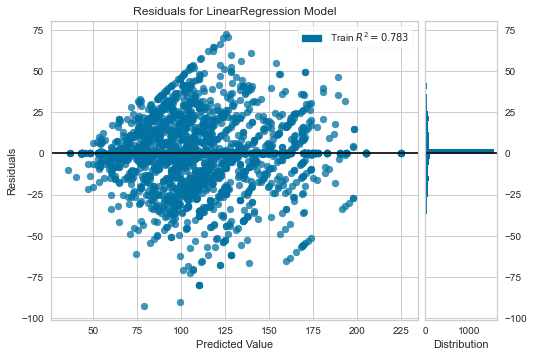

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [14]:
#residual for Linear Regression
#viz = residuals_plot(LinearRegression(), X_train, y_train,  X_test, y_test)

# Residual for Linear 
from yellowbrick.regressor import ResidualsPlot
# Instantiate the linear model and visualizer

visualizer = ResidualsPlot(LinearRegression())

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
#visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

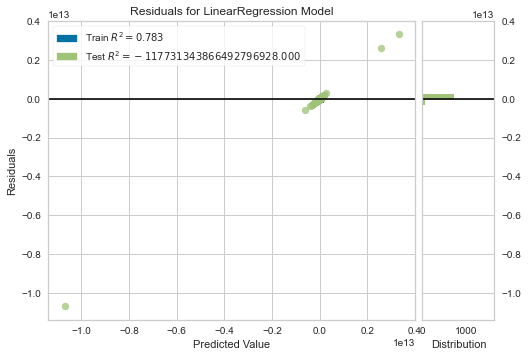

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [15]:
#viz = residuals_plot(LinearRegression(), X_train, y_train,  X_test, y_test)

# Residual for Ridge 
from yellowbrick.regressor import ResidualsPlot
# Instantiate the linear model and visualizer

visualizer = ResidualsPlot(LinearRegression())

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

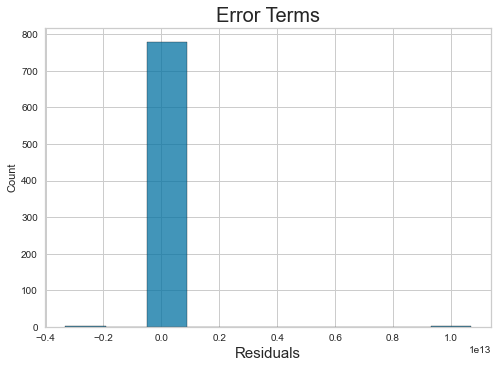

In [16]:
residuals = y_test-linear_pred
sns.histplot(residuals, bins = 10) #histplot
plt.title('Error Terms', fontsize=20)           
plt.xlabel('Residuals', fontsize = 15)     
plt.show()

## Ridge Regression

In [17]:
# define model
ridge = Ridge(alpha=1.0, normalize=True)#normalize=True sure all the variable are on same scale
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

#accuracy
accuracy = ridge.score(X_train,y_train)
print('\nModel Accuracy:- ', accuracy*100,'%')

accuracy = ridge.score(X_test,y_test)
print('\nTest Data Accuracy:- ', accuracy*100,'%')


Model Accuracy:-  66.71371504880918 %

Test Data Accuracy:-  27.752282362118564 %


Ridge Regression gives us accuracy of 24% on test data

### MAE

In [18]:
def mae(y, ypred):
    """Mean absolute error.
    
    Calculate the mean absolute error of the arguments

    Arguments:
    y -- the observed values
    predction -- the predicted values
    What exactly does ‘ERROR’ in this metric mean ?
    Prediction Error => Actual Value - Predicted Value
    """
    abs_error = np.abs(y - ypred)
    mae = np.mean(abs_error)
    return mae

In [19]:
mae(y_test,ridge_pred )

26.657078704805365

### Mean absolute percentage Accuracy (MAPE)

In [20]:
errors = abs(ridge_pred - y_test)

In [21]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Mean absolute percentage Accuracy :', round(accuracy, 2), '%.')
print('Mean absolute percentage error (MAPE):', round(np.mean(mape), 2), '%.')

Mean absolute percentage Accuracy : 71.09 %.
Mean absolute percentage error (MAPE): 28.91 %.


### Mean Squared Error

In [22]:
from sklearn.metrics import mean_squared_error 
MSE = mean_squared_error(y_test,ridge_pred)
print(MSE)

1055.4678694295903


To convert this back to our measurement space, we often take the square root, to form the root mean square error:

In [23]:
print('Mean Squared Error',np.sqrt(MSE))

Mean Squared Error 32.48796499366481


### Actual vs Predected

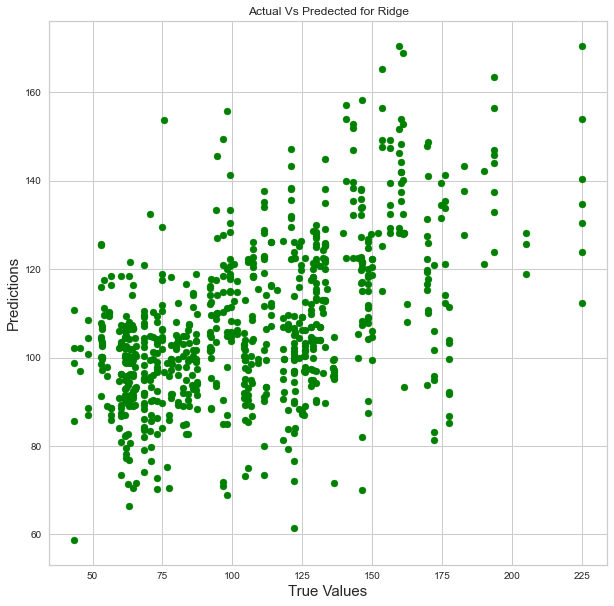

In [24]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, ridge_pred, c='green')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.title("Actual Vs Predected for Ridge")
#plt.axis('equal')
plt.show()

In [25]:
#plt.scatter(residuals,ridge_pred)


### Residual plot for Ridge Regression

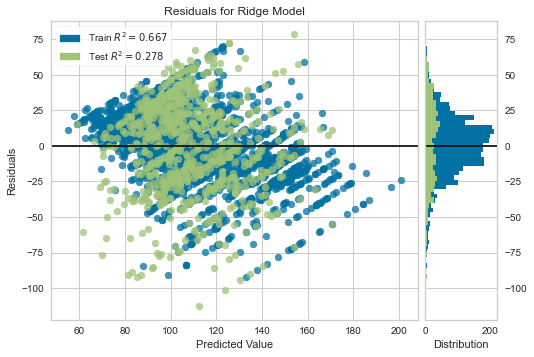

<AxesSubplot:title={'center':'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [26]:
# Residual for Ridge 
from yellowbrick.regressor import ResidualsPlot
# Instantiate the linear model and visualizer

visualizer = ResidualsPlot(ridge)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure



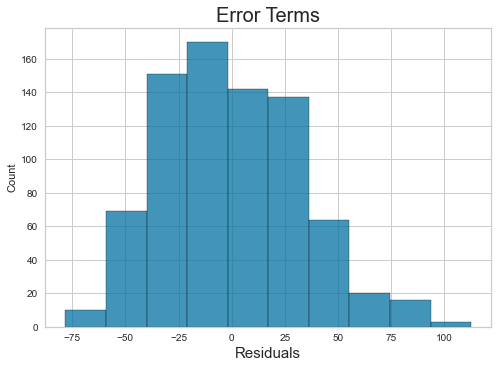

In [27]:
residuals = y_test-ridge_pred
sns.histplot(residuals, bins = 10) #histplot
plt.title('Error Terms', fontsize=20)           
plt.xlabel('Residuals', fontsize = 15)     
plt.show()

## Lasso Regression

In [28]:
#define model
lasso = Lasso(alpha=0.1, normalize=True)
#fit the model
lasso.fit(X_train, y_train)
#make a prediction
lasso_pred = lasso.predict(X_test)

#check accuracy
accuracy = lasso.score(X_train,y_train)
print('\nModel Accuracy:- ', accuracy*100,'%')

accuracy = lasso.score(X_test,y_test)
print('\nTest Data Accuracy:- ', accuracy*100,'%')


Model Accuracy:-  18.804779358243408 %

Test Data Accuracy:-  21.060548307136763 %


### MAE

In [29]:
mae(y_test,lasso_pred )

28.463825984603815

### Mean absolute percentage Accuracy (MAPE)

In [30]:
# Calculate mean absolute percentage error (MAPE)
errors = abs(lasso_pred - y_test)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Mean absolute percentage Accuracy :', round(accuracy, 2), '%.')
print('Mean absolute percentage error (MAPE):', round(np.mean(mape), 2), '%.')

Mean absolute percentage Accuracy : 68.99 %.
Mean absolute percentage error (MAPE): 31.01 %.


### Mean squared error

In [31]:
from sklearn.metrics import mean_squared_error 
MSE = mean_squared_error(y_test,lasso_pred)

print(MSE)

1153.2275013836634


In [32]:
print('Mean Squared Error',np.sqrt(MSE))

Mean Squared Error 33.95920348570713


In [33]:
residuals = y_test-lasso_pred

### Resedual plot for Lasso regression

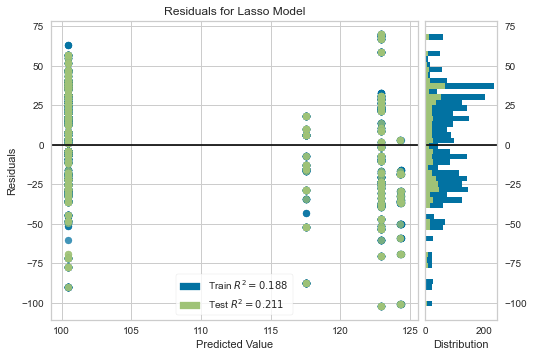

In [34]:
# Lasso Residual

from yellowbrick.regressor import residuals_plot
# Create the visualizer, fit, score, and show it
viz = residuals_plot(lasso, X_train, y_train, X_test, y_test)



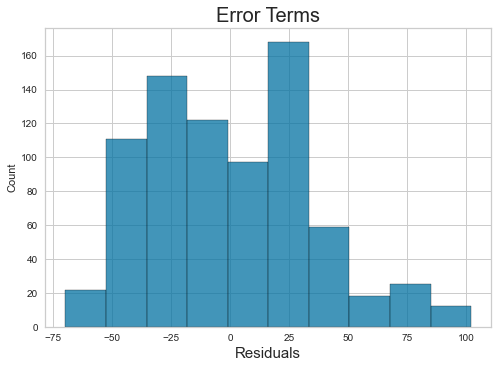

In [35]:
sns.histplot(residuals, bins = 10) #histplot
plt.title('Error Terms', fontsize=20)           
plt.xlabel('Residuals', fontsize = 15)     
plt.show()

## Random Forest

In [36]:
#create randomforrest Model
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 100 decision trees
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [37]:
#make a prediction
random_pred = rf.predict(X_test)

#check accuracy
accuracy = rf.score(X_train,y_train)
print('\nModel Accuracy:- ', accuracy*100,'%')

accuracy = rf.score(X_test,y_test)
print('\nTest Data Accuracy:- ', accuracy*100,'%')


Model Accuracy:-  82.5158107117118 %

Test Data Accuracy:-  30.956638183387362 %


### MAE

In [38]:
mae(y_test,random_pred )

24.358122938640342

In [39]:
errors = abs(random_pred - y_test)

### MAPE

In [40]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Mean absolute percentage Accuracy :', round(accuracy, 2), '%.')
print('Mean absolute percentage error (MAPE):', round(np.mean(mape), 2), '%.')

Mean absolute percentage Accuracy : 74.69 %.
Mean absolute percentage error (MAPE): 25.31 %.


### MSE

In [41]:
from sklearn.metrics import mean_squared_error 
MSE = mean_squared_error(y_test,random_pred)
print(MSE)

1008.6553925494134


In [42]:
print('Mean Squared Error',np.sqrt(MSE))

Mean Squared Error 31.759335518071115


### Residual plot of Random Forest Model

In [43]:
residuals = y_test-random_pred

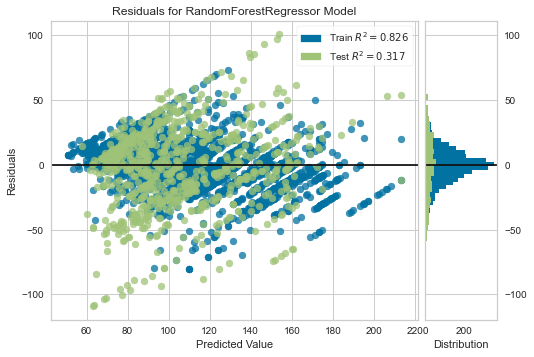

In [44]:
#residual for Random Forest
from yellowbrick.regressor import residuals_plot
# Create the visualizer, fit, score, and show it
viz = residuals_plot(RandomForestRegressor(), X_train, y_train, X_test, y_test)


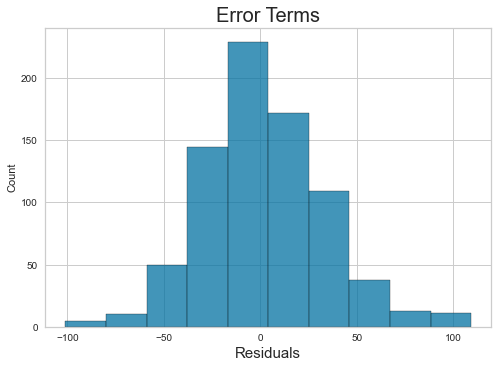

In [45]:
sns.histplot(residuals, bins = 10) #histplot
plt.title('Error Terms', fontsize=20)           
plt.xlabel('Residuals', fontsize = 15)     
plt.show()

In [46]:
residuals.describe()


count    782.000000
mean       2.327583
std       31.694200
min     -101.027262
25%      -18.452486
50%       -0.079333
75%       21.612446
max      109.242500
Name: Est_Salary, dtype: float64

In [47]:
#residuals.describe()
qntl2p5, qntl97p5 = residuals.quantile(0.025) , residuals.quantile(0.975)
print("RF residual at 2.5% is ", qntl2p5)
print("RF residual at 97.5% is ", qntl97p5)

RF residual at 2.5% is  -56.17274107142857
RF residual at 97.5% is  71.03459375000003


In [48]:
#Check if below givs the right result 
import scipy.stats as st
#create 95% confidence interval for residual
st.t.interval(alpha=.95, df=len(residuals)-1, loc=np.mean(residuals), scale=st.sem(residuals)) 


(0.10274688354998895, 4.552419506006393)

In [49]:
RFresidual95 = residuals[residuals > -56.172 ]
RFresidual95 = RFresidual95[RFresidual95 < 71.0349]
print("95 percentile Residual Count " , RFresidual95.count())
test_residuals_neg = RFresidual95[RFresidual95 < 0]
test_residuals_pos = RFresidual95[RFresidual95 > 0]

print("test_residuals_neg",test_residuals_neg.count())
print("test_residuals_pos",test_residuals_pos.count())

95 percentile Residual Count  742
test_residuals_neg 372
test_residuals_pos 370


In [50]:
print("Positive test residual",  test_residuals_pos.max())
print("Negative test residual", test_residuals_neg.min())

Positive test residual 70.38166666666666
Negative test residual -56.0925


 In worst case scenarion 
* if our predicted value is very **high** then we subtract **"Negative test residual"** i.e. 56 to get the right **prediction**. 

* if our predicted value is very **low** then we add **"Positive test residual"** i.e. 70 to get the right **prediction**. 

# OLS 

### Training Data

In [51]:
#Run regression using statsmodels
import statsmodels.api as sm
import math
from sklearn.metrics import mean_squared_error

X_train = sm.add_constant(X_train) # required if constant expected
est = sm.OLS(y_train,X_train).fit() # fit model
predictions = est.predict() # get predicted values
print(est.summary()) # prints full regression results
print("\nAverage error: {:.2f}.".format(math.sqrt(est.mse_resid)))

E:\anaconda\lib\site-packages\statsmodels\base\model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse


                            OLS Regression Results                            
Dep. Variable:             Est_Salary   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     2.004
Date:                Wed, 17 Feb 2021   Prob (F-statistic):           7.21e-37
Time:                        18:29:37   Log-Likelihood:                -13456.
No. Observations:                3127   AIC:                         3.094e+04
Df Residuals:                    1115   BIC:                         4.310e+04
Df Model:                        2011                                         
Covariance Type:            nonrobust                                         
                                                                                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

### Test data

In [52]:
# Run regression using statsmodels
import statsmodels.api as sm

X_test = sm.add_constant(X_test) # required if constant expected
est = sm.OLS(y_test,X_test).fit() # fit model
predictions = est.predict() # get predicted values
print(est.summary()) # prints full regression results
print("\nAverage error: {:.2f}.".format(math.sqrt(est.mse_resid)))

E:\anaconda\lib\site-packages\statsmodels\base\model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse


                            OLS Regression Results                            
Dep. Variable:             Est_Salary   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     1.649
Date:                Wed, 17 Feb 2021   Prob (F-statistic):           0.000719
Time:                        18:29:45   Log-Likelihood:                -3015.3
No. Observations:                 782   AIC:                             7377.
Df Residuals:                     109   BIC:                         1.051e+04
Df Model:                         672                                         
Covariance Type:            nonrobust                                         
                                                                                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

|  Regresion  |  MAE	|  MAPE 	|  MSE   | Test data accuracy |
| ---: | :--- | :--- | :--- | :--- |
| Linear | 44764789385.07 | 25.31 | 414721445179.73 | -1.17
| Ridge | 26.65 | 28.91 | 32.48 | 27.75
| Lasso | 28.46 | 31.01 | 33.95 | 21.06	
| Random Forest | 24.35 | 25.31 | 31.75 | 30.95


According to above result Random forest model works best with dataset